In [163]:
import json
from matplotlib import pyplot
from datetime import datetime
from ipaddress import IPv4Address

In [164]:
with open("packet_counts.json") as packet_counts_file:
    raw_packet_counts = json.load(packet_counts_file)

In [165]:
with open("throughput.json") as throughput_file:
    throughput = json.load(throughput_file)

In [166]:
packet_counts = dict()
for sample in raw_packet_counts:
    ip = IPv4Address(sample["ip"])
    if ip not in packet_counts:
        packet_counts[ip] = dict()
    packet_counts[ip][datetime.fromisoformat(sample["time"])] = {int(port): int(count) for (port, count) in sample["counts"].items()}
packet_counts

{IPv4Address('10.2.2.1'): {datetime.datetime(2024, 6, 5, 9, 50, 8, 878024): {4294967294: 0,
   4: 7,
   1: 8,
   2: 8,
   3: 9},
  datetime.datetime(2024, 6, 5, 9, 50, 13, 883977): {4294967294: 0,
   4: 10,
   1: 15,
   2: 14,
   3: 19},
  datetime.datetime(2024, 6, 5, 9, 50, 18, 893570): {4294967294: 0,
   4: 12,
   1: 29,
   2: 29,
   3: 46},
  datetime.datetime(2024, 6, 5, 9, 50, 23, 897561): {4294967294: 0,
   4: 13,
   1: 60,
   2: 43,
   3: 86},
  datetime.datetime(2024, 6, 5, 9, 50, 28, 904993): {4294967294: 0,
   4: 14,
   1: 87,
   2: 83,
   3: 135},
  datetime.datetime(2024, 6, 5, 9, 50, 33, 907869): {4294967294: 0,
   4: 16,
   1: 649,
   2: 643,
   3: 1210},
  datetime.datetime(2024, 6, 5, 9, 50, 38, 913498): {4294967294: 0,
   4: 18,
   1: 2226,
   2: 2211,
   3: 4256},
  datetime.datetime(2024, 6, 5, 9, 50, 43, 928226): {4294967294: 0,
   4: 19,
   1: 3621,
   2: 3609,
   3: 6949},
  datetime.datetime(2024, 6, 5, 9, 50, 48, 934296): {4294967294: 0,
   4: 20,
   1: 4850,
 

In [167]:
latest_packet_counts = dict()
for (ip, switch_data) in packet_counts.items():
    latest_packet_counts[ip] = max(switch_data.items(), key=lambda pair: pair[0])[1]
latest_packet_counts

{IPv4Address('10.2.2.1'): {4294967294: 0, 1: 11097, 2: 12038},
 IPv4Address('10.4.2.2'): {4294967294: 0},
 IPv4Address('10.4.1.2'): {4294967294: 0},
 IPv4Address('10.1.2.1'): {4294967294: 0, 2: 10515},
 IPv4Address('10.2.3.1'): {4294967294: 0, 1: 28, 2: 28},
 IPv4Address('10.1.0.1'): {4294967294: 0},
 IPv4Address('10.2.1.1'): {4294967294: 0, 1: 12014, 4: 27, 2: 89, 3: 11325},
 IPv4Address('10.0.3.1'): {4294967294: 0},
 IPv4Address('10.0.0.1'): {4294967294: 0},
 IPv4Address('10.0.1.1'): {4294967294: 0},
 IPv4Address('10.2.0.1'): {4294967294: 0, 4: 27, 1: 11072, 2: 90, 3: 10355},
 IPv4Address('10.3.1.1'): {4294967294: 0, 4: 27, 1: 11193, 2: 89, 3: 10515},
 IPv4Address('10.4.1.1'): {4294967294: 0},
 IPv4Address('10.4.2.1'): {4294967294: 0},
 IPv4Address('10.3.2.1'): {4294967294: 0, 1: 12252, 2: 11216},
 IPv4Address('10.1.1.1'): {4294967294: 0,
  4: 27,
  1: 18446744073709551615,
  2: 90,
  3: 11541},
 IPv4Address('10.1.3.1'): {4294967294: 0, 2: 26},
 IPv4Address('10.3.0.1'): {4294967294: 

Text(0, 0.5, 'Sent Packets')

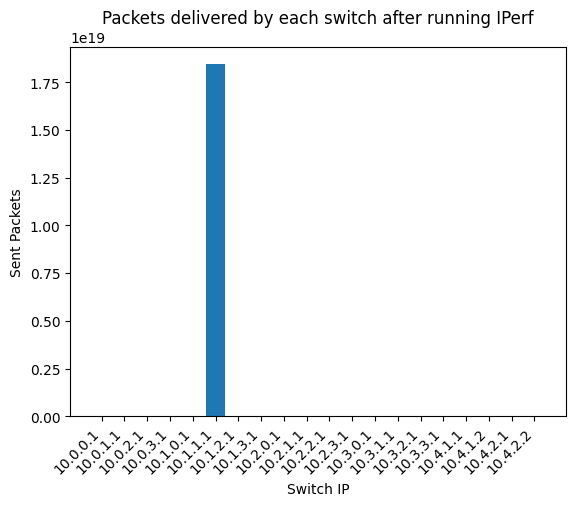

In [168]:
ips = list(latest_packet_counts.keys())
ips.sort()
total_packets = [sum(latest_packet_counts[ip].values()) for ip in ips]
pyplot.bar(range(len(ips)), total_packets, tick_label=[str(ip) for ip in ips])
pyplot.xticks(rotation=45, ha="right")
pyplot.title("Packets delivered by each switch after running IPerf")
pyplot.xlabel("Switch IP")
pyplot.ylabel("Sent Packets")